59
Country
Germany            851
France             719
Spain              439
Netherlands        268
United Kingdom     219
Italy              178
DE                 174
Switzerland        144
Austria            140
Norway             131
Poland             124
Sweden             111
FR                 109
Belgium             74
Kingdom             53
Denmark             41
Finland             38
Greece              34
Portugal            30
NL                  29
ES                  29
Czech Republic      29
SE                  22
CH                  20
GB                  20
Hungary             17
Slovakia            16
Ireland             15
PL                  15
Romania             14
IT                  13
AT                  12
Slovenia            11
Croatia             10
Estonia             10
Bulgaria            10
BE                  10
NO                   9
CZ                   8
DK                   5
Iceland              5
Luxembourg           4
Lithuania            4


<Axes: xlabel='Country'>

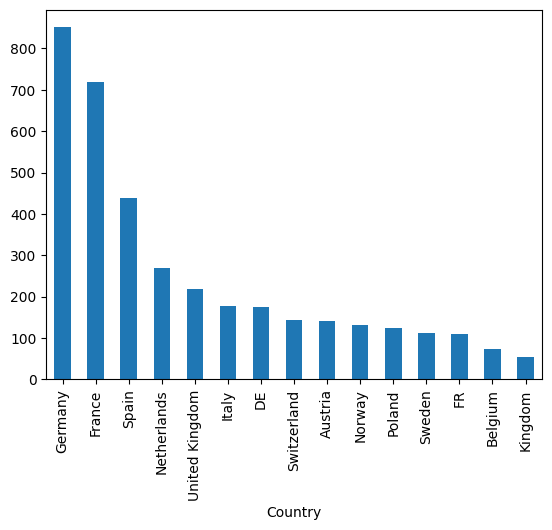

In [3]:
#analysis of country distribution from my datasets
#!pip install matplotlib
import pandas as pd
import matplotlib

#load the data from my locations folder and read the csv files
#I have 10 datasets, so I will read them all
df1 = pd.read_excel('locations/locations_hydro_V12.xlsx')

#count the number of each country
country_count = df1["Country"].value_counts()

#print(country_count)
#show total number of rows
print(country_count.count())
print(country_count)
#show the number of unique countries


#plot the data
#country_count.plot(kind='bar')
#show only the top 10 countries
#country_count[:15].plot(kind='bar')
country_count[:15].plot(kind='bar')

#country_count[10:30].plot(kind='bar', color='red')

In [ ]:
df = read_excel()

In [4]:
import pandas as pd
import requests
from requests.structures import CaseInsensitiveDict

# Replace 'YOUR_API_KEY' with your actual Geoapify API key
api_key = 'edb8cde1acdc48f39b75476ff37d05f3'

# Load the csv file
df = pd.read_csv('../CorrelationAnalysis\data\location_hydrogeneuroperesearch.csv')

# Define the API endpoint
base_url = 'https://api.geoapify.com/v1/geocode/search'

# Define the headers for the API request
headers = CaseInsensitiveDict()
headers['Accept'] = 'application/json'

# Initialize an empty list to store country information
countries = []

# Loop through each address to retrieve the country
for index, row in df.iterrows():
    address = row['Full Address']

    if pd.isnull(address):
        countries.append(None)
        continue

    # Define the parameters for the API request
    params = {
        'text': address,
        'apiKey': api_key,
        'lang': 'en',  # Set the language to English
        'limit': 1,  # Set the limit to 1 to get the first result
        'type': 'amenity'  # Set the location type to amenity (you can adjust this based on your needs)
    }

    # Send the API request
    response = requests.get(base_url, params=params, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response
        response_data = response.json()

        # Check if 'features' list is not empty
        if len(response_data['features']) > 0:
            # Extract the country from the response
            country = response_data['features'][0]['properties']['country']

            # Append the country to the list
            countries.append(country)

            # Print the address and country for each successful request
            print(f"Address: {address}")
            print(f"Country: {country}")
            print()
        else:
            print(f"No results found for address: {address}")
            countries.append(None)
    else:
        print(f"Error geocoding address: {address}")
        countries.append(None)

# Create a new column in the DataFrame to store the country information
df['Country'] = countries
print("Country information added to the DataFrame.")

Address: Fredrik Bajers Vej 7K, 9220 Aalborg, North Denmark Region Denmark
Country: Denmark

Address: Aalto University P.O. Box 11000 (Otakaari 1B) FI-00076 AALTO
Country: Ethiopia

Address: Tuomiokirkontori, 20500 Turku, Finland
Country: Finland

Address: Aleja Adama Mickiewicza 30, 30-059 Krakow, Poland
Country: Poland

Address: Via Zamboni 33, 40126 Bologna, Emilia-Romagna Italy
Country: Italy

Address: Parque tecnológico Walqa Ctra. N-330a, 22197 Huesca, Aragon Spain
Country: Spain

Address: Giefinggasse 4, 1210, Vienna Austria
Country: Austria

Address: Avenue Franklin Roosevelt - Franklin Rooseveltlaan 50, Brussels, Belgium
Country: Belgium

Address: Platz der Deutschen Einheit 1 03046 Cottbus
Country: Germany

Address: 3, Avenue Claude Guillemin, Orleans, 45060 France
Country: France

Address: Brunel University London, Uxbridge, UB8 3PH, United Kingdom
Country: United Kingdom

No results found for address: Acad. Georgi Bonchev Str., Block 10 1113 Sofia, Bulgaria
Address: Unter d

In [7]:
# Save the updated DataFrame to a new CSV file
df.to_excel('..\CorrelationAnalysis\data\location_hydrogeneuroperesearch.xlsx', index=False)

print("Country information added to the DataFrame.")

Country information added to the DataFrame.


In [2]:
!pip install googletrans
from googletrans import Translator
import pandas as pd

# Read the CSV file
df = pd.read_excel('locations/locations_hydro_V5.1.xlsx')

# Create a translator object
translator = Translator()

# Country code to country name mapping dictionary for European countries
european_countries = {
    'AL': 'Albania',
    'AD': 'Andorra',
    'AM': 'Armenia',
    'AT': 'Austria',
    'AZ': 'Azerbaijan',
    'BY': 'Belarus',
    'BE': 'Belgium',
    'BA': 'Bosnia and Herzegovina',
    'BG': 'Bulgaria',
    'HR': 'Croatia',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'FI': 'Finland',
    'FR': 'France',
    'GE': 'Georgia',
    'DE': 'Germany',
    'GR': 'Greece',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IE': 'Ireland',
    'IT': 'Italy',
    'KZ': 'Kazakhstan',
    'LV': 'Latvia',
    'LI': 'Liechtenstein',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MT': 'Malta',
    'MD': 'Moldova',
    'MC': 'Monaco',
    'ME': 'Montenegro',
    'NL': 'Netherlands',
    'MK': 'North Macedonia',
    'NO': 'Norway',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'RU': 'Russia',
    'SM': 'San Marino',
    'RS': 'Serbia',
    'SK': 'Slovakia',
    'SI': 'Slovenia',
    'ES': 'Spain',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'GB': 'United Kingdom',
    'VA': 'Vatican City'
}

# Translate the "Land" column
def translate_country_code(code):
    return european_countries.get(code, None)

df['Country'] = df['Länderkürzel'].apply(translate_country_code)

# Save the translated DataFrame to a new CSV file
df.to_csv('locations/location_amadeus.csv', index=False)


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------------------------- 55.1/55.1 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 133.4/133.4 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
   ---------------------------------------- 58.

In [45]:
dfx = pd.read_excel('locations/combined_excel.xlsx')
dfx

dfx.to_csv('locations/location.csv', index=False)

In [4]:
#transform into excel files
import pandas as pd
df = pd.read_csv('locations/locations_hydro_V4.csv')
df.to_excel('locations/locations_hydro_V4.xlsx', index=False)

In [20]:

import requests

import requests
import pandas as pd

def get_country_from_lon_lat(lon, lat, api_key):
    url = "https://api.geoapify.com/v1/geocode/reverse"
    params = {
        "lat": lat,
        "lon": lon,
        "type": "country",
        "format": "json",
        "apiKey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()

    if data.get('results') and len(data['results']) > 0:
        result = data['results'][0]
        country = result.get('country')
        print(f"Country for coordinates ({lon}, {lat}): {country}")
        return country
    else:
        return None

# Example usage
api_key = "edb8cde1acdc48f39b75476ff37d05f3"  # Replace with your actual Geoapify API key

# Read the DataFrame from Excel file
df = pd.read_excel('locations/locations_hydro_V5.1.xlsx')

# Create a new DataFrame to store the country information
df_country = df
df_country['country_new'] = df.apply(lambda row: get_country_from_lon_lat(row['Longitude'], row['Latitude'], api_key), axis=1)

# Display the new DataFrame
print(df_country)



Country for coordinates (8.27128530323418, 50.29946965): Germany
Country for coordinates (12.07863874886448, 47.48784935): Austria
Country for coordinates (28.20470960306756, 36.3395715): Greece
Country for coordinates (21.17392558119144, 52.2071571): Poland
Country for coordinates (-9.1439462, 38.7288472): Portugal
Country for coordinates (-2.66523, 53.350767): United Kingdom
Country for coordinates (7.083733369217654, 52.11571435): Germany
Country for coordinates (19.065788, 49.832097): Poland
Country for coordinates (-1.4766609, 47.2647203): France
Country for coordinates (6.177191, 49.112029): France
Country for coordinates (1.768774, 49.169681): France
Country for coordinates (2.627126, 48.79755): France
Country for coordinates (7.004849, 47.155573): Switzerland
Country for coordinates (9.025275680403707, 48.62944155): Germany
Country for coordinates (9.144435, 45.376241): Italy
Country for coordinates (-3.9811721, 55.8343469): United Kingdom
Country for coordinates (-2.1143592335

In [22]:
df_country.to_csv('locations/locations_hydro_V5.2.csv', index=False)

In [1]:
df = pd.read_csv('locations/locations_hydro_V4.csv')
df.to_excel('locations/locations_hydro_V4.xlsx', index=False)

NameError: name 'pd' is not defined